In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data= np.linspace(1,10,100000)

In [4]:
noise = np.random.normal(-1,1.5,[len(x_data)])

In [5]:
y_data = 0.3*x_data + 8 + noise

In [6]:
x_df = pd.DataFrame(x_data,columns=['x'])
y_f = pd.DataFrame(y_data,columns=['y'])

In [7]:
data = pd.concat([x_df,y_f],axis=1)

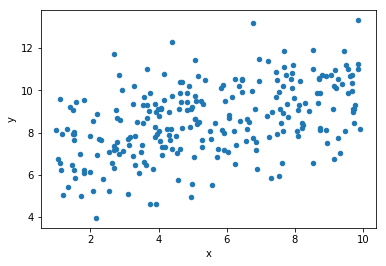

In [8]:
data.sample(250).plot(kind='scatter',x='x',y='y')

In [9]:
import tensorflow as tf

/home/userhadoop/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


y = mx + c

In [10]:
batch_size = 10

In [11]:
m = tf.Variable(0.7,dtype=tf.float64)
c= tf.Variable(0.3,dtype=tf.float64)

In [12]:
phx = tf.placeholder(dtype=tf.float64,shape=[batch_size])
phy= tf.placeholder(dtype=tf.float64,shape=[batch_size])

In [13]:
y_hat =( m * phx) + c

In [14]:
error = tf.reduce_sum(tf.square(phy-y_hat))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [16]:
train = optimizer.minimize(error)

In [17]:
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 10000
    
    for i in range(epochs):
        rand_index = np.random.randint(len(x_data),size=[batch_size])
        feed_data = {phx:x_data[rand_index],phy:y_data[rand_index]}
        sess.run(train,feed_dict=feed_data)
    slope,intercept = sess.run([m,c])

In [19]:
intercept

6.9945945826917

In [20]:
y_pred = (slope*x_data) + intercept

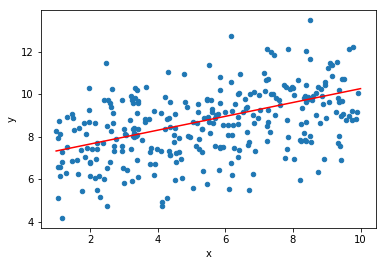

In [21]:
data.sample(300).plot(x='x',y='y',kind='scatter')

plt.plot(x_data,y_pred,'r')


____________________________________________________________________________________--

--------------------------------------------

In [22]:
featur_col= [tf.feature_column.numeric_column('x',[1])]

In [23]:
estimator = tf.estimator.LinearRegressor(feature_columns=featur_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3993cd2358>, '_tf_random_seed': None, '_num_worker_replicas': 1, '_task_id': 0, '_save_summary_steps': 100, '_master': '', '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_service': None, '_session_config': None, '_model_dir': '/tmp/tmphm605v8k', '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_evaluation_master': '', '_is_chief': True, '_train_distribute': None}


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_data,test_size=0.3) 

In [47]:
train_func= tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,shuffle=True)

In [48]:
estimator.train(input_fn=train_func,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphm605v8k/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8001 into /tmp/tmphm605v8k/model.ckpt.
INFO:tensorflow:step = 8001, loss = 6.929209
INFO:tensorflow:global_step/sec: 571.442
INFO:tensorflow:step = 8101, loss = 12.38689 (0.178 sec)
INFO:tensorflow:global_step/sec: 667.442
INFO:tensorflow:step = 8201, loss = 15.002968 (0.149 sec)
INFO:tensorflow:global_step/sec: 729.553
INFO:tensorflow:step = 8301, loss = 7.7599573 (0.136 sec)
INFO:tensorflow:global_step/sec: 821.651
INFO:tensorflow:step = 8401, loss = 5.293144 (0.121 sec)
INFO:tensorflow:global_step/sec: 785.65
INFO:tensorflow:step = 8501, loss = 2.2138128 (0.129 sec)
INFO:tensorflow:global_step/sec: 782.372
INFO:tensorflow:step = 8601, los

INFO:tensorflow:step = 15901, loss = 1.8695419 (0.118 sec)
INFO:tensorflow:global_step/sec: 833.361
INFO:tensorflow:step = 16001, loss = 3.567854 (0.120 sec)
INFO:tensorflow:global_step/sec: 818.139
INFO:tensorflow:step = 16101, loss = 9.578647 (0.122 sec)
INFO:tensorflow:global_step/sec: 741.203
INFO:tensorflow:step = 16201, loss = 12.085691 (0.135 sec)
INFO:tensorflow:global_step/sec: 829.017
INFO:tensorflow:step = 16301, loss = 4.4754295 (0.120 sec)
INFO:tensorflow:global_step/sec: 808.145
INFO:tensorflow:step = 16401, loss = 5.741045 (0.124 sec)
INFO:tensorflow:global_step/sec: 821.787
INFO:tensorflow:step = 16501, loss = 2.7371 (0.122 sec)
INFO:tensorflow:global_step/sec: 843.369
INFO:tensorflow:step = 16601, loss = 16.252266 (0.118 sec)
INFO:tensorflow:global_step/sec: 814.719
INFO:tensorflow:step = 16701, loss = 10.049396 (0.123 sec)
INFO:tensorflow:global_step/sec: 821.966
INFO:tensorflow:step = 16801, loss = 32.202625 (0.121 sec)
INFO:tensorflow:global_step/sec: 802.503
INFO:t

In [49]:
train_data_eval_fun =tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,shuffle=False,num_epochs=100)

In [50]:
evaluate_train_data = estimator.evaluate(input_fn=train_data_eval_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-14-12:09:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphm605v8k/model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-14-12:09:56
INFO:tensorflow:Saving dict for global step 18000: average_loss = 2.2645783, global_step = 18000, loss = 289.86603


In [51]:
test_data_eval_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,shuffle=False,num_epochs=1000)

In [52]:
evaluate_test_data = estimator.evaluate(input_fn=test_data_eval_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-14-12:10:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphm605v8k/model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-14-12:10:03
INFO:tensorflow:Saving dict for global step 18000: average_loss = 2.2650306, global_step = 18000, loss = 289.92392


In [53]:
print('train metrics: {}'.format(evaluate_train_data))
print('test_metrics: {}'.format(evaluate_test_data))

train metrics: {'average_loss': 2.2645783, 'loss': 289.86603, 'global_step': 18000}
test_metrics: {'average_loss': 2.2650306, 'loss': 289.92392, 'global_step': 18000}


In [54]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [55]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphm605v8k/model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([7.0046067], dtype=float32)},
 {'predictions': array([7.345864], dtype=float32)},
 {'predictions': array([7.687121], dtype=float32)},
 {'predictions': array([8.028378], dtype=float32)},
 {'predictions': array([8.369635], dtype=float32)},
 {'predictions': array([8.710892], dtype=float32)},
 {'predictions': array([9.052149], dtype=float32)},
 {'predictions': array([9.393406], dtype=float32)},
 {'predictions': array([9.734663], dtype=float32)},
 {'predictions': array([10.07592], dtype=float32)}]

In [56]:
predictions = []
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphm605v8k/model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [57]:
predictions

[array([7.0046067], dtype=float32),
 array([7.345864], dtype=float32),
 array([7.687121], dtype=float32),
 array([8.028378], dtype=float32),
 array([8.369635], dtype=float32),
 array([8.710892], dtype=float32),
 array([9.052149], dtype=float32),
 array([9.393406], dtype=float32),
 array([9.734663], dtype=float32),
 array([10.07592], dtype=float32)]